In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import gzip
import json
import string
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

## Perform sentimental analysis on the Elon-musk tweets

In [2]:
muskdf = pd.read_csv('Elon_musk.csv', encoding='latin-1',on_bad_lines='skip')

In [3]:
muskdf.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
muskdf.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [5]:
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sailo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sailo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def text_cleaner(text):
    text = text.lower() #lowercase 
    text = re.sub(r'https://t.co/\w+','',text,flags=re.MULTILINE) #removing links which start with https://t.co/
    text = re.sub(r'@\w+|\#','',text) #removing @ and # characters
    text = text.translate(str.maketrans('','',string.punctuation)) #removing puncutation characters
    text_tokens = word_tokenize(text) #tokenizing words
    filtered_text = [w for w in text_tokens if not w in my_stop_words] # removing stop words
    return " ".join(filtered_text)

In [7]:
muskdf.Text = muskdf['Text'].apply(text_cleaner)

In [8]:
muskdf = muskdf.drop_duplicates('Text')

In [9]:
muskdf = muskdf[['Text']]
muskdf

,Text
0,im alien
1,ray tracing cyberpunk hdr nextlevel tried
2,great interview
3,doge underestimated
4,congratulations tesla china amazing execution ...
...,...
1994,true sounds surreal negative propaganda still ...
1995,make sure read ur terms amp conditions clickin...
1996,samwise gamgee
1997,altho dumb dumber u0001f525u0001f525


In [10]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [11]:
muskdf['Text'] = muskdf['Text'].apply(lambda x : stemming(x))

In [12]:
muskdf.head()

,Text
0,im alien
1,ray tracing cyberpunk hdr nextlevel tried
2,great interview
3,doge underestimated
4,congratulations tesla china amazing execution ...


In [13]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:
muskdf['polarity'] = muskdf['Text'].apply(polarity)

In [15]:
muskdf.head(10)

,Text,polarity
0,im alien,-0.250000
1,ray tracing cyberpunk hdr nextlevel tried,0.000000
2,great interview,0.800000
3,doge underestimated,0.000000
4,congratulations tesla china amazing execution ...,0.200000
5,happy new year ox,0.468182
6,frodo underdoge thought would fail,-0.500000
7,haha thanks,0.200000
8,indeed tweets definitely represent realworld t...,0.000000
9,entertaining outcome likely,0.250000


In [16]:
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label > 0:
        return "Positive"
    elif label == 0:
        return "Neutral"

In [17]:
muskdf['sentiment'] = muskdf['polarity'].apply(sentiment)

In [18]:
muskdf.head(10)

,Text,polarity,sentiment
0,im alien,-0.250000,Negative
1,ray tracing cyberpunk hdr nextlevel tried,0.000000,Neutral
2,great interview,0.800000,Positive
3,doge underestimated,0.000000,Neutral
4,congratulations tesla china amazing execution ...,0.200000,Positive
5,happy new year ox,0.468182,Positive
6,frodo underdoge thought would fail,-0.500000,Negative
7,haha thanks,0.200000,Positive
8,indeed tweets definitely represent realworld t...,0.000000,Neutral
9,entertaining outcome likely,0.250000,Positive


<Axes: xlabel='sentiment', ylabel='count'>

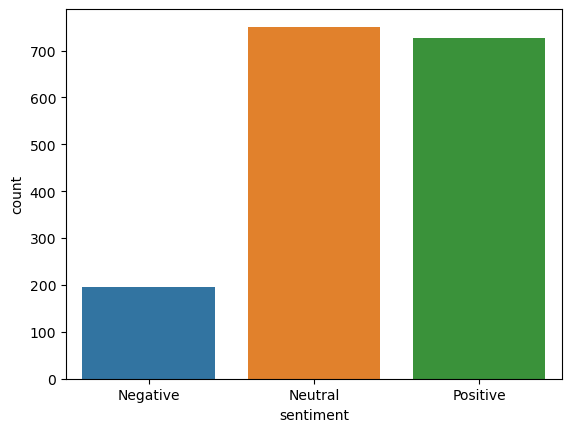

In [19]:
sns.countplot(x='sentiment',data=muskdf)

Added this below stopwords after analysing the highest unnecessary words using wordclouds

In [20]:
stopwords = STOPWORDS
stopwords.add('amp')
stopwords.add('rt')
stopwords.add('s')
stopwords.add('tesla')
stopwords.add('spacex')
stopwords.add('space')
stopwords.add('launch')
stopwords.add('year')

In [21]:
pos_tweets = muskdf[muskdf.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending=False)
pos_tweets.head()

,Text,polarity,sentiment
1836,impressive tianwen1 mars rover mission launche...,1.0,Positive
1298,lego movie awesome,1.0,Positive
1080,one best shots ever,1.0,Positive
1723,mein herz brennt best boss battle song ever,1.0,Positive
340,u0001f3a9 greatest gatsby u0001f3a9,1.0,Positive


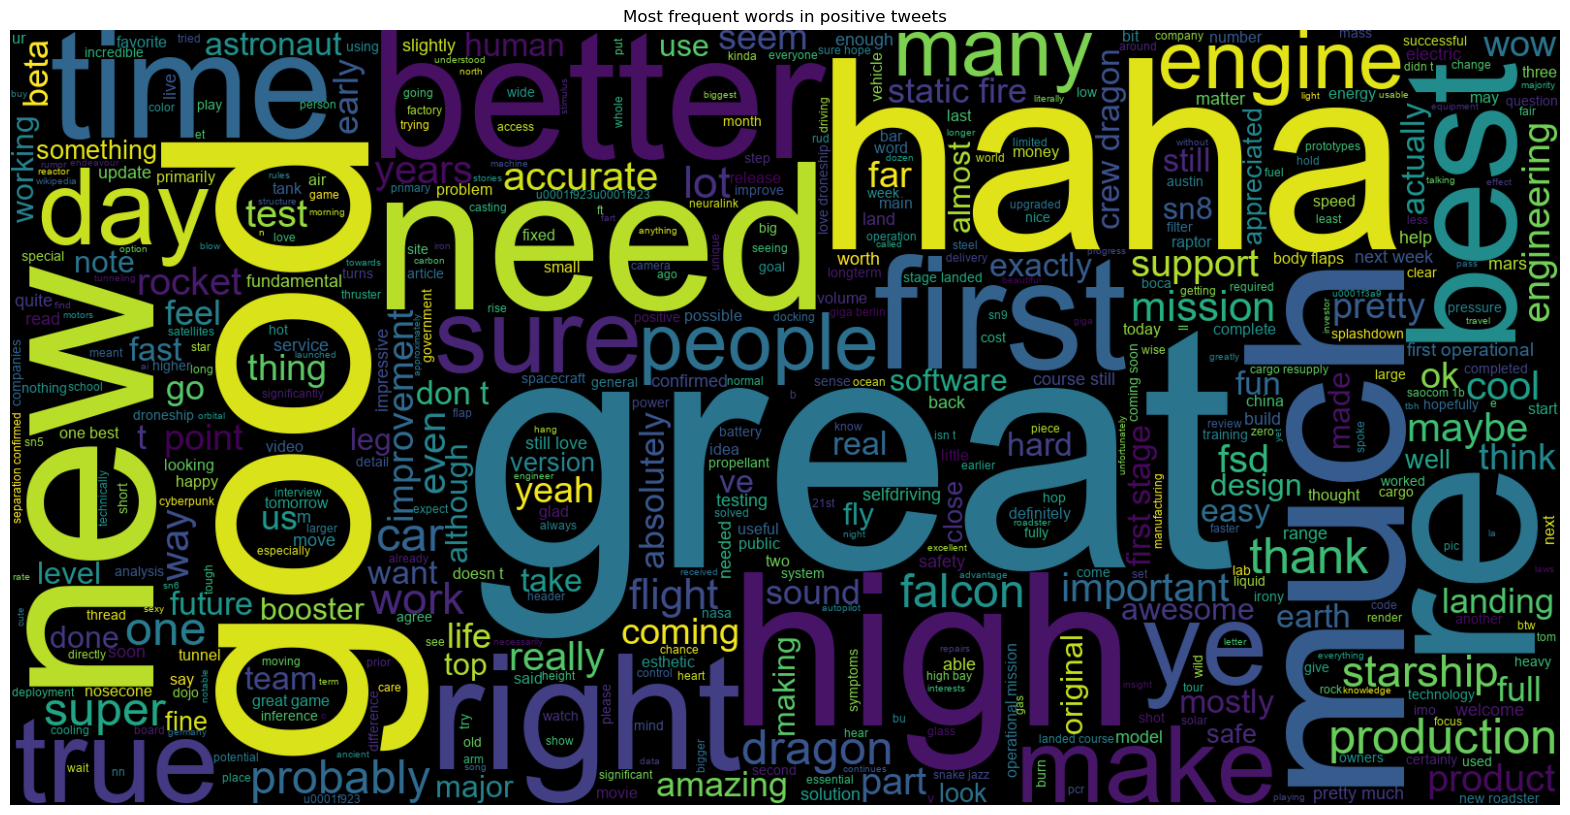

In [22]:
text = ' '.join([word for word in pos_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800,font_path="./arial.ttf",stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets')
plt.show()

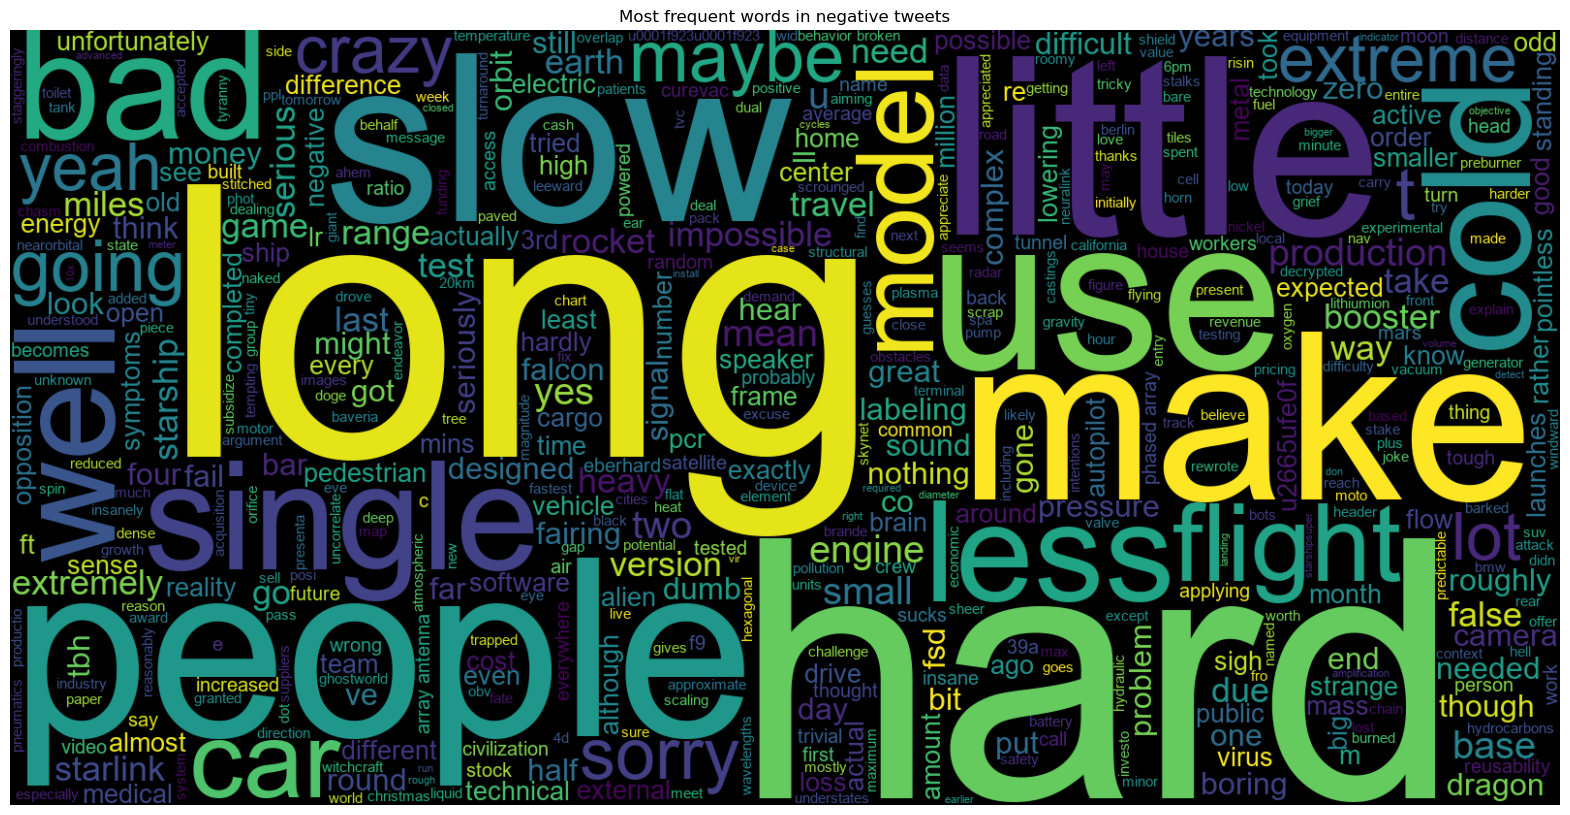

In [23]:
neg_tweets = muskdf[muskdf.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending=False)
neg_tweets.head()

text = ' '.join([word for word in neg_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800,font_path="./arial.ttf",stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets')
plt.show()

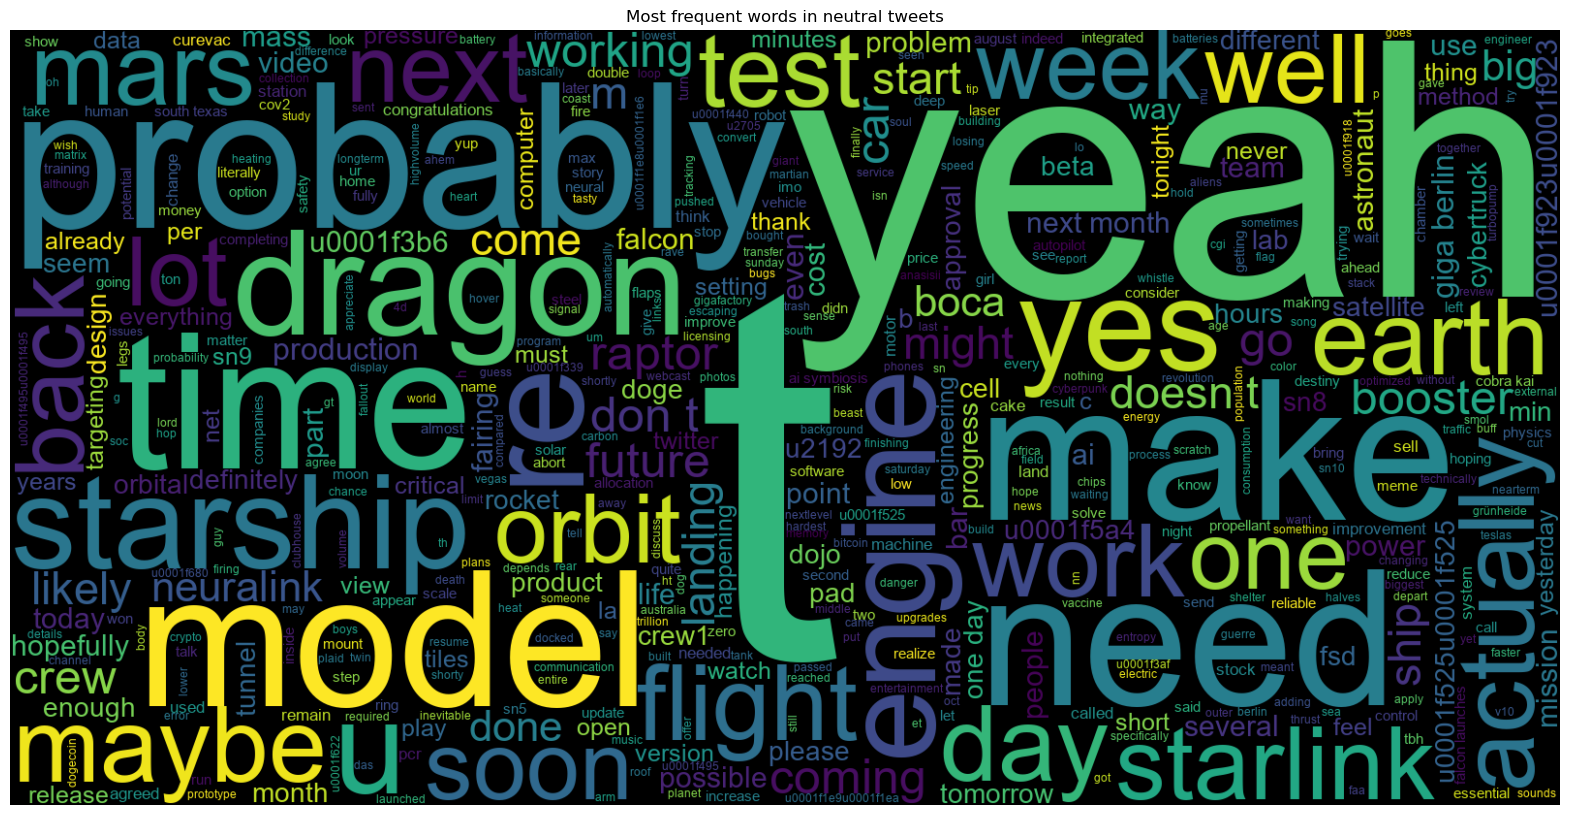

In [24]:
neutral_tweets = muskdf[muskdf.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending=False)
neutral_tweets.head()

text = ' '.join([word for word in neutral_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500,width=1600,height=800,font_path="./arial.ttf",stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets')
plt.show()

## Extract reviews of any product from ecommerce website like amazon

In [25]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

videoGames = getDF('Video_Games_5.json.gz')

In [26]:
videoGames.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [27]:
videoGames = videoGames[videoGames['verified'] == True]

In [28]:
videoGames.drop(columns=['verified','reviewTime','reviewerID','asin','reviewerName','summary','unixReviewTime','vote','style','image'],inplace=True)

In [29]:
videoGames.head()

,overall,reviewText
0,5.0,"This game is a bit hard to get the hang of, bu..."
2,3.0,ok game.
3,2.0,"found the game a bit too complicated, not what..."
4,5.0,"great game, I love it and have played it since..."
5,4.0,i liked a lot some time that i haven't play a ...


In [30]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332645 entries, 0 to 497576
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     332645 non-null  float64
 1   reviewText  332504 non-null  object 
dtypes: float64(1), object(1)
memory usage: 7.6+ MB


In [31]:
videoGames = videoGames.dropna()

In [32]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332504 entries, 0 to 497576
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     332504 non-null  float64
 1   reviewText  332504 non-null  object 
dtypes: float64(1), object(1)
memory usage: 7.6+ MB


In [33]:
videoGames = videoGames.drop_duplicates()

In [34]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254197 entries, 0 to 497576
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     254197 non-null  float64
 1   reviewText  254197 non-null  object 
dtypes: float64(1), object(1)
memory usage: 5.8+ MB


Considering only till 3000 rows for performance constraints

In [35]:
videoGames = videoGames.iloc[:3000,:]

In [36]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 8407
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overall     3000 non-null   float64
 1   reviewText  3000 non-null   object 
dtypes: float64(1), object(1)
memory usage: 70.3+ KB


In [37]:
videoGames = videoGames[['reviewText']]

In [38]:
videoGames.head()

,reviewText
0,"This game is a bit hard to get the hang of, bu..."
2,ok game.
3,"found the game a bit too complicated, not what..."
4,"great game, I love it and have played it since..."
5,i liked a lot some time that i haven't play a ...


In [39]:
from nltk.corpus import stopwords

In [40]:
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sailo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sailo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
def text_cleaner(text):
    text = text.lower() #lowercase 
    text = text.translate(str.maketrans('','',string.punctuation)) #removing puncutation characters
    text_tokens = word_tokenize(text) #tokenizing words
    filtered_text = [w for w in text_tokens if not w in my_stop_words] # removing stop words
    return " ".join(filtered_text)

In [42]:
videoGames.reviewText = videoGames['reviewText'].apply(text_cleaner)

In [43]:
vglst = [x.strip() for x in videoGames.reviewText]

In [44]:
vglst[0:14]

['game bit hard get hang great',
 'ok game',
 'found game bit complicated expected played 1602 1503 1701',
 'great game love played since arrived',
 'liked lot time havent play wonderfull game simply funny game verry good game',
 'bought game thinking would pretty cool might play week two done boy wrong moment finally got gamed fired commentors right takes forever u forced create account watched booted could tell right bat alot thought went making game ever played sim city game must try easily navigate thru multi layers playing htis month straight still discovering layers complexity game things game could used tweaked 5 star game',
 'played old anno 1701 1503 game looks great complex previous versions game found lot things lacking sources power inability store energy batteries regenertive fuel cells buildings game need power trade main beef requires internet connection wonderful artistry graphics anno 1701 set future world global warmming flood land resource scarcity sent human kind lo

In [45]:
from spacy import displacy

In [46]:
nlp = spacy.load('en_core_web_sm')

one_block = vglst[6]
doc_block = nlp(one_block)
displacy.render(doc_block, style='ent', jupyter=True)

Let's now try to take the parts of speech for the words

In [47]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [48]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [49]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [50]:
videoGames['sentiment_value'] = videoGames['reviewText'].apply(calculate_sentiment)
videoGames.head()

,reviewText,sentiment_value
0,game bit hard get hang great,2
2,ok game,0
3,found game bit complicated expected played 160...,0
4,great game love played since arrived,6
5,liked lot time havent play wonderfull game sim...,9


In [51]:
videoGames.sort_values(by='sentiment_value',ascending=False)

,reviewText,sentiment_value
4682,getting tired microsoft combat flight simulato...,149
964,rare extraordinary knack making great games ba...,92
3809,originally saw segas stellar dreamcast action ...,84
7189,wish rereleasing old classic games new systems...,73
5022,ive always enjoyed licensed video games create...,67
...,...,...
3538,resident evil code veronica compare previous g...,-25
1299,first ive owned two crash games first crash ba...,-25
7510,exactly everybody said already game bad really...,-26
5443,resident evil clone follow foot steps silent h...,-35


C:\Users\sailo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


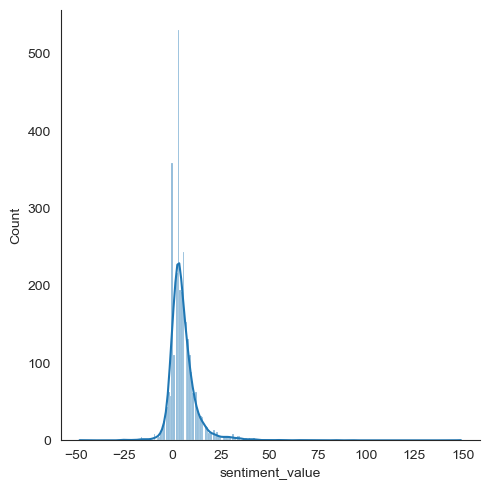

In [52]:
sns.set_style(style='white') 
sns.displot(videoGames['sentiment_value'],kde=True)
plt.show()

In [53]:
videoGames['index']=range(0,len(videoGames))

In [54]:
videoGames['word_count'] = videoGames['reviewText'].str.split().apply(len)

<Axes: xlabel='index', ylabel='sentiment_value'>

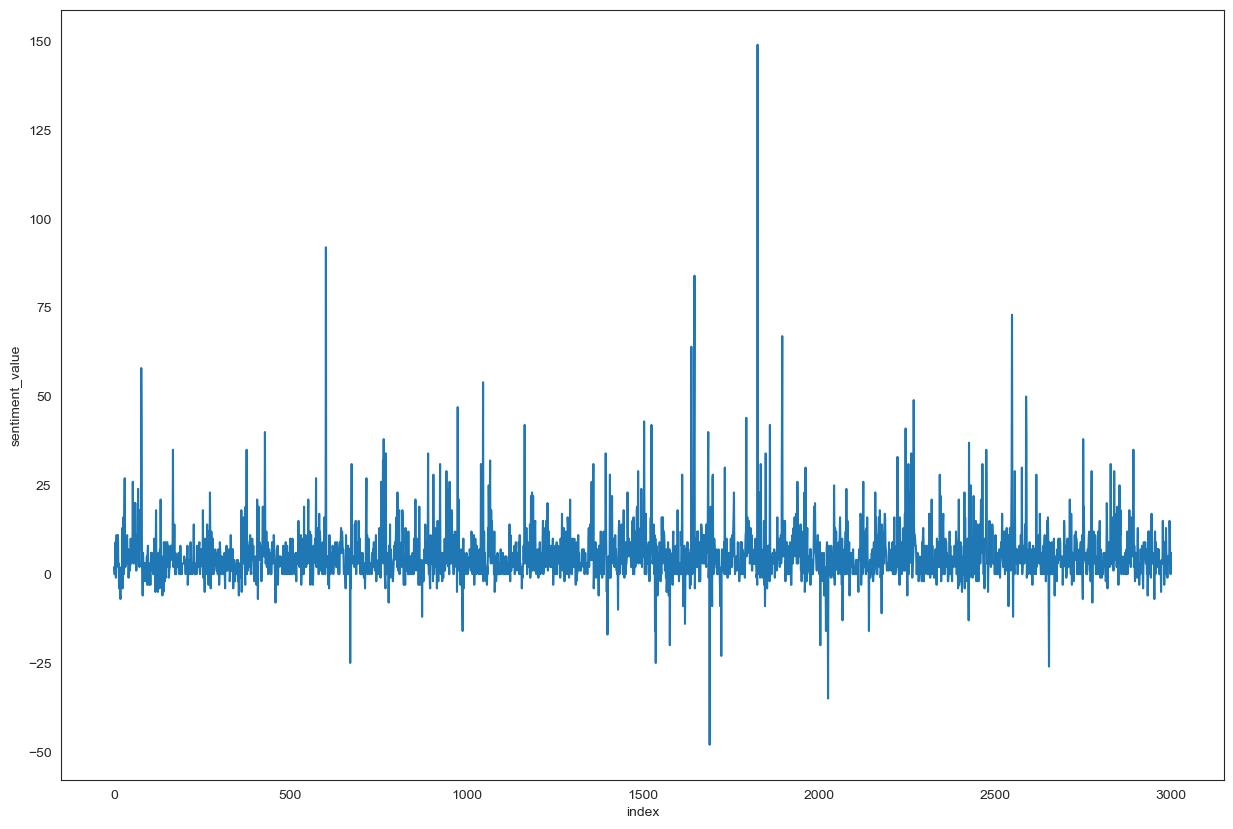

In [55]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=videoGames)

From this plot we can visualize the behaviour of sentiment values across the data, with highest and lowest spikes being the reviews having the highest and the lowest sentimental values of all the other reviews.

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

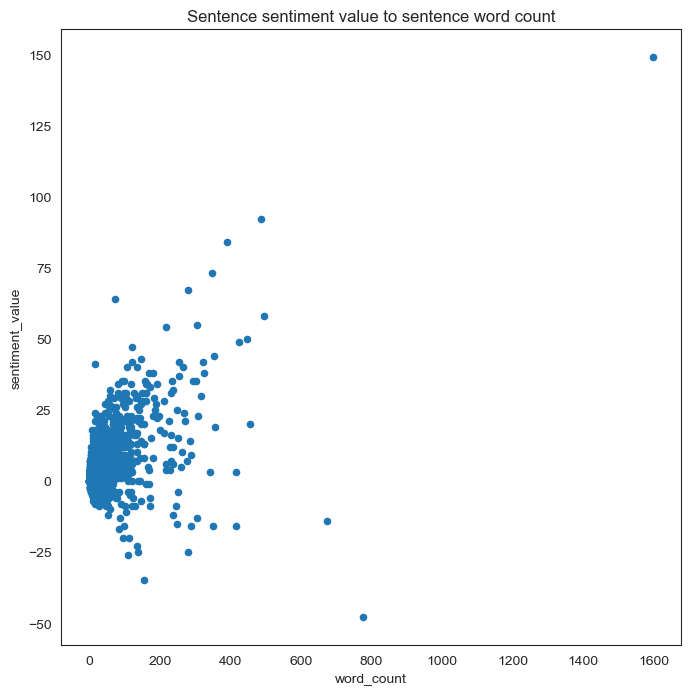

In [56]:
videoGames.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

From this plot we can see that most of the reviews were having words less than 200 per review. 